In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
models = ['GPT-4', 'GPT-3.5-Turbo-0125', 'GPT-3.5-Turbo-1106']
methods = ['Baseline', 'Fine-tuned', 'RAG Fine-tuned']
categories = ['Total Token Count']

In [3]:
# token cost data
toxic_comment_challenge_costs = {
    'Baseline': [0.142, 0.0537664999999999, 0.143766999999999],
    'Fine-tuned': [0.3959175, 0.0831835, 0.165367],
    'RAG Fine-tuned': [0.902865, 0.128072, 0.356313]
}

In [4]:

toxicity_dataset_costs = {
    'Baseline': [0.1289975, 0.0304189999999999, 0.0995949999999999],
    'Fine-tuned': [0.3033625, 0.0646645, 0.128331],
    'RAG Fine-tuned': [0.6476075, 0.187608499999999, 0.374218999999999]
}

In [5]:

unintended_biases_costs = {
    'Baseline': [0.2158375, 0.0493124999999999, 0.141938999999999],
    'Fine-tuned': [0.3876975, 0.0815395, 0.162079],
    'RAG Fine-tuned': [0.723805, 0.187906, 0.374669]
}

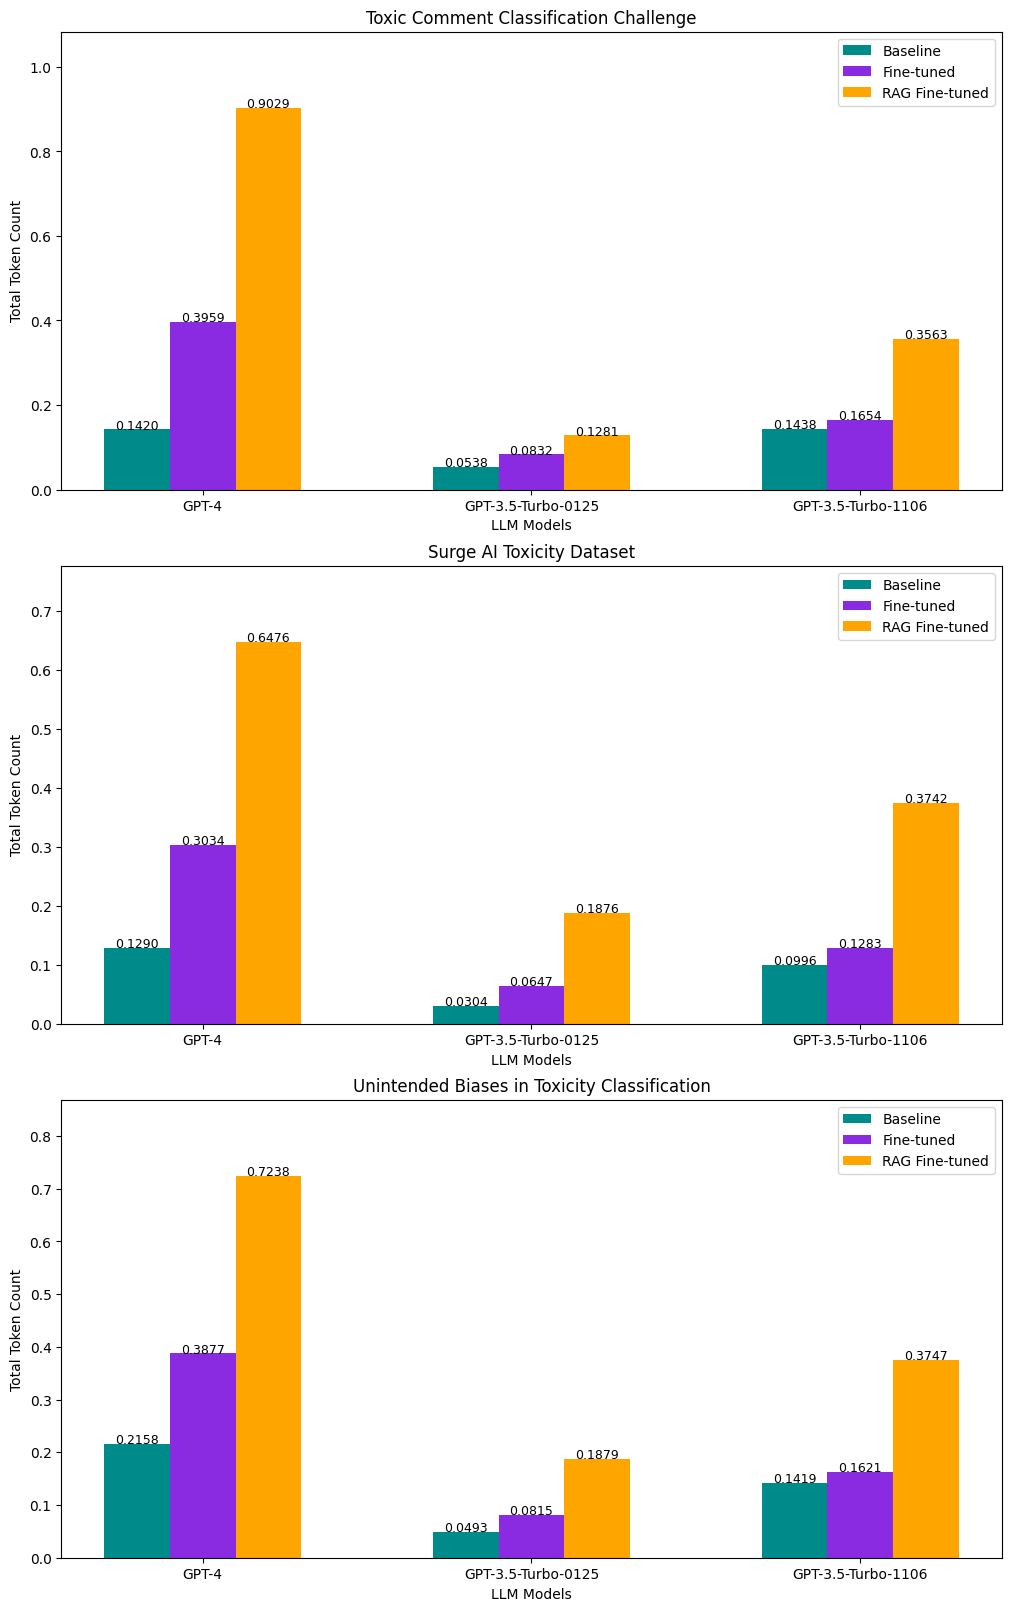

In [6]:
datasets = [toxic_comment_challenge_costs, toxicity_dataset_costs, unintended_biases_costs]
dataset_titles = ["Toxic Comment Classification Challenge", "Surge AI Toxicity Dataset", "Unintended Biases in Toxicity Classification"]

x = np.arange(len(models))  # Model positions
width = 0.2  # Adjusted bar width
# ['#ff9999', '#66b3ff', '#99ff99'] ['#008B8B', '#8A2BE2', '#FFA500']
colors = ['#008B8B', '#8A2BE2', '#FFA500'] # Colors for each method

fig, axes = plt.subplots(len(datasets), 1, figsize=(10, 16), constrained_layout=True)

if len(datasets) > 1:
    axes = np.array(axes).flatten()

for i, (dataset, title) in enumerate(zip(datasets, dataset_titles)):
    ax = axes[i]
    
    for j, method in enumerate(methods):
        values = dataset[method]
        ax.bar(x + j * width - width, values, width, label=method, color=colors[j])
        
        # Display values on bars
        for m, v in enumerate(values):
            ax.text(x[m] + j * width - width, v + 0.001, f'{v:.4f}', ha='center', fontsize=9)
    
    ax.set_xlabel("LLM Models")
    ax.set_ylabel("Total Token Count")
    ax.set_title(f"{title}")
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()
    ax.set_ylim([0, max(max(dataset[method]) for method in methods) * 1.2])  # Dynamic y-axis scaling

plt.show()
